In [2]:
import scanpy as sc

In [ ]:
mat = sc.read_10x_h5('C:/Users/Nihanth/Downloads/GSE178341_crc10x_full_c295v4_submit.h5')
mat.var_names_make_unique(join='/')

In [ ]:
mat.obs['sample'] = mat.obs.index
mat.obs[['sample','barcode']] = mat.obs['sample'].str.split('-', expand=True)

In [ ]:
mat.write_h5ad('C:/Users/Nihanth/Documents/AP Research/GSE178341_full.h5ad')

NameError: name 'mat' is not defined

In [ ]:
adata = sc.read_h5ad('C:/Users/Nihanth/Documents/AP Research/GSE178341_full.h5ad')

In [ ]:
adata.obs["sample_type"] = adata.obs["sample"].str.split("_").str[1]
adata = adata[adata.obs["sample_type"] == "T"]

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)

Trying to set attribute `.obs` of view, copying.


In [ ]:
sc.pp.filter_genes(adata, min_cells=500)

In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')

In [ ]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

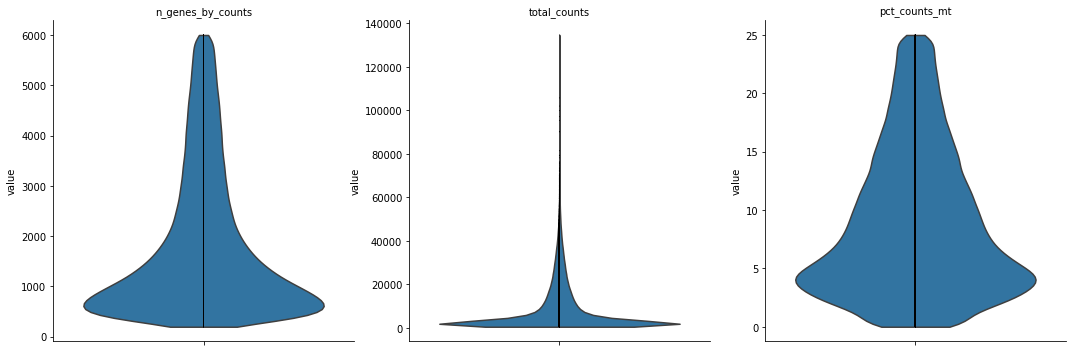

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0, multi_panel=True)

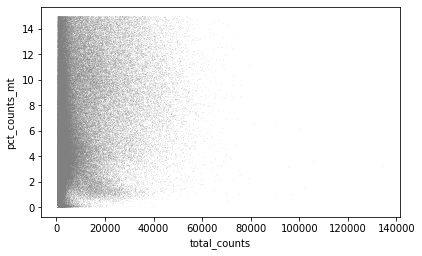

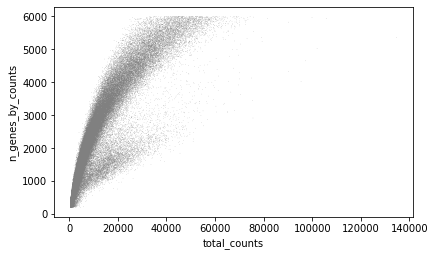

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]

In [ ]:
adata.write_h5ad('C:/Users/Nihanth/Documents/AP Research/GSE178341_filtered.h5ad')

In [ ]:
import scanpy as sc

: 

In [2]:
adata = sc.read_h5ad('C:/Users/Nihanth/Documents/AP Research/GSE178341_filtered.h5ad')

In [4]:
adata.obs

,sample,barcode,sample_type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT,C103_T_1_1_0_c1_v2_id,AAACCTGCATGCTAGT,T,2953,2944,15084.0,1151.0,7.630602
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT,C103_T_1_1_0_c1_v2_id,AAACCTGTCATGTGGT,T,3363,3354,16245.0,1764.0,10.858726
C103_T_1_1_0_c1_v2_id-AAACCTGTCGGATGTT,C103_T_1_1_0_c1_v2_id,AAACCTGTCGGATGTT,T,898,894,1933.0,189.0,9.777548
C103_T_1_1_0_c1_v2_id-AAACGGGAGAGAACAG,C103_T_1_1_0_c1_v2_id,AAACGGGAGAGAACAG,T,3027,3022,13234.0,1532.0,11.576242
C103_T_1_1_0_c1_v2_id-AAACGGGAGTAGCCGA,C103_T_1_1_0_c1_v2_id,AAACGGGAGTAGCCGA,T,2648,2642,9748.0,1287.0,13.202709
...,...,...,...,...,...,...,...,...
C173_T_0_0_0_c1_v3_id-TTTGACTGTGTTAACC,C173_T_0_0_0_c1_v3_id,TTTGACTGTGTTAACC,T,4396,4385,17859.0,2211.0,12.380312
C173_T_0_0_0_c1_v3_id-TTTGATCAGACCCTTA,C173_T_0_0_0_c1_v3_id,TTTGATCAGACCCTTA,T,740,740,1438.0,206.0,14.325452
C173_T_0_0_0_c1_v3_id-TTTGATCTCGTCCTTG,C173_T_0_0_0_c1_v3_id,TTTGATCTCGTCCTTG,T,564,564,943.0,63.0,6.680806
C173_T_0_0_0_c1_v3_id-TTTGGAGAGAATCGCG,C173_T_0_0_0_c1_v3_id,TTTGGAGAGAATCGCG,T,1492,1488,3356.0,359.0,10.697259


In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [ ]:
sc.pp.log1p(adata)

In [ ]:
adata.raw = adata

In [ ]:
cell_cycle_genes = [x.strip() for x in open('regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [ ]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

C:\Python38\lib\site-packages\scanpy\tools\_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
C:\Python38\lib\site-packages\scanpy\tools\_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


C:\Python38\lib\site-packages\anndata\_core\anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phase' as categorical


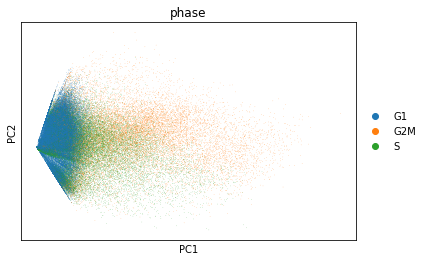

In [ ]:
adata_cc_genes = adata[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0075, max_mean=3, min_disp=0)

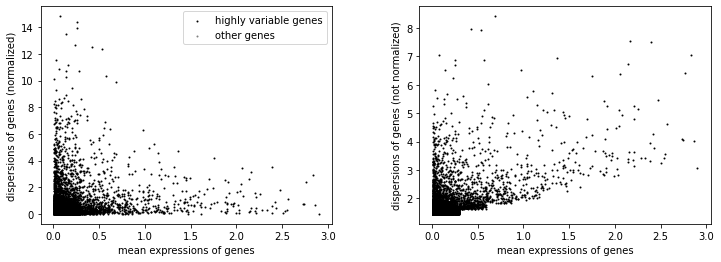

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.regress_out(adata, ['S_score', 'G2M_score'])

C:\Python38\lib\site-packages\anndata\_core\anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
C:\Python38\lib\site-packages\anndata\_core\anndata.py:1236: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical


In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.25)

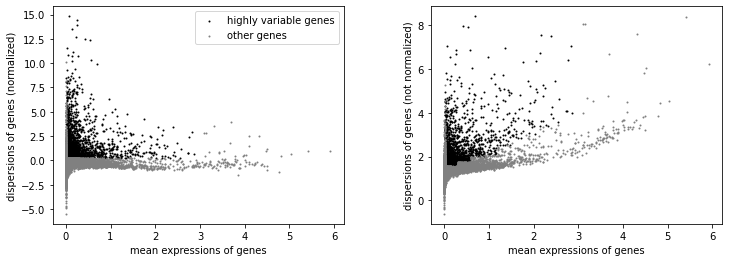

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.scale(adata, max_value=10)

C:\Python38\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

In [ ]:
#adata.write("adata.h5ad")
adata.write("adata_cellcycleregress.h5ad")

In [ ]:
import scanpy as sc

In [ ]:
adata = sc.read_h5ad("adata.h5ad")

In [ ]:
adata.obs["sample"]

C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT    C103_T_1_1_0_c1_v2_id
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT    C103_T_1_1_0_c1_v2_id
C103_T_1_1_0_c1_v2_id-AAACCTGTCGGATGTT    C103_T_1_1_0_c1_v2_id
C103_T_1_1_0_c1_v2_id-AAACGGGAGAGAACAG    C103_T_1_1_0_c1_v2_id
C103_T_1_1_0_c1_v2_id-AAACGGGAGTAGCCGA    C103_T_1_1_0_c1_v2_id
                                                  ...          
C173_T_0_0_0_c1_v3_id-TTTGACTGTGTTAACC    C173_T_0_0_0_c1_v3_id
C173_T_0_0_0_c1_v3_id-TTTGATCAGACCCTTA    C173_T_0_0_0_c1_v3_id
C173_T_0_0_0_c1_v3_id-TTTGATCTCGTCCTTG    C173_T_0_0_0_c1_v3_id
C173_T_0_0_0_c1_v3_id-TTTGGAGAGAATCGCG    C173_T_0_0_0_c1_v3_id
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC    C173_T_0_0_0_c1_v3_id
Name: sample, Length: 147658, dtype: category
Categories (120, object): ['C103_T_1_1_0_c1_v2_id', 'C103_T_1_1_3_c1_v2_id', 'C104_T_1_1_0_c1_v2_id', 'C104_T_1_1_3_c1_v2_id', ..., 'C170_T_0_0_0_c1_v3_id', 'C170_T_0_0_1_c1_v3_id', 'C172_T_0_0_0_c1_v3_id', 'C173_T_0_0_0_c1_v3_id']

In [ ]:
#sc.external.pp.harmony_integrate(adata, "sample")
sc.external.pp.scanorama_integrate(adata, "sample")

In [ ]:
import scanpy as sc
adata = sc.read_h5ad("adata_noregress.h5ad")

In [ ]:
adata = sc.read_h5ad("adata_leiden.h5ad")

In [ ]:
non_mito_genes_list = adata.var_names[~adata.var_names.str.startswith('MT-')]
adata = adata[:, non_mito_genes_list]

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(adata)
#sc.external.pp.bbknn(adata, batch_key='sample')

In [ ]:
sc.tl.umap(adata)


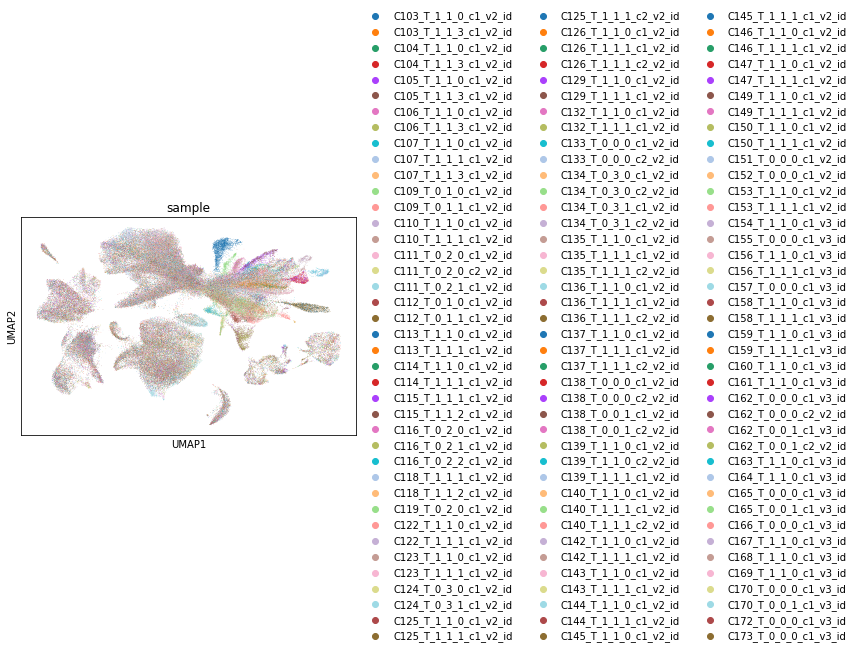

In [ ]:
sc.pl.umap(adata, color=['sample'], palette=sc.pl.palettes.default_20)

In [ ]:
adata.write("adata_batchcorr_scanorama.h5ad")

In [ ]:
import scanpy as sc

In [15]:
adata = sc.read_h5ad("adata_mtregress_batchcorr_scanorama.h5ad")

In [ ]:
sc.tl.leiden(adata, resolution=1, key_added='leiden')

In [ ]:
#Cluster Type Celltype Score Times
['0', 'Good', 'Endothelial cell', 7.056162657483587, 2.350057586570301]
['1', '?', 'Endothelial cell|Natural killer cell', '4.862587066241066|3.1889284597388716', 1.5248341653419355]
['10', '?', 'Mesenchymal stem cell|Endothelial cell', '6.557198280354915|5.873715063037105', 1.1163630189722555]
['11', '?', 'Mesenchymal stem cell|Stem cell', '9.025125433075624|6.231272647027147', 1.4483599008272228]
['12', '?', 'Mesenchymal stem cell|Endothelial cell', '8.278062719382014|5.062492432871584', 1.6351753270051745]
['13', '?', 'Mesenchymal stem cell|Endothelial cell', '8.799214814818125|4.826793706668331', 1.8229937613993734]
['14', '?', 'Mesenchymal stem cell|Endothelial cell', '8.256921119342746|5.240852157257065', 1.5754920901382987]
['15', '?', 'Astrocyte|Epithelial cell', '4.140272714101584|3.7684716625328427', 1.0986609652038217]
['16', '?', 'Mesenchymal stem cell|Endothelial cell', '8.467392954850961|7.014872092719711', 1.2070630573063093]
['17', '?', 'Endothelial cell|Mesenchymal stem cell', '9.557765163999232|8.421702493819877', 1.1348970319259122]
['18', '?', 'Endothelial cell|Mesenchymal stem cell', '9.69741884860169|7.91156533157248', 1.2257269506329487]
['2', '?', 'Endothelial cell|Natural killer cell', '4.373174770658279|3.5446804177299875', 1.2337289276585501]
['3', '?', 'T helper17 (Th17) cell|Monocyte', '5.464900925807563|4.067557148913269', 1.343533901488667]
['4', '?', 'Mast cell|Mesenchymal stem cell', '6.991191595058271|5.6851226380697755', 1.2297345264361674]
['5', '?', 'Mesenchymal stem cell|B cell', '8.220507861697333|4.64780075219534', 1.768687665411316]
['6', '?', 'Myeloid dendritic cell|Dendritic cell', '6.206391119753854|3.6927260543567004', 1.6807071600752828]
['7', '?', 'Mast cell|Myeloid dendritic cell', '5.42165952705626|5.0061966372820175', 1.0829897265081876]
['8', '?', 'Mesenchymal stem cell|Hematopoietic stem cell', '7.9487125265803025|4.506289484112702', 1.7639152022088571]
['9', '?', 'Mesenchymal stem cell|Endothelial cell', '7.7543176182304006|5.131919326724491', 1.5109975672941232]

In [ ]:
#Cluster Type Celltype Score Times
['0', 'Good', 'Endothelial cell', 7.083356477192914, 3.8332036940805545]
['1', '?', 'Neutrophil|Natural killer cell', '3.9463216394026586|3.174871867592445', 1.242986112190794]
['2', '?', 'Endothelial cell|B cell', '4.7749816782236065|3.4552338387470143', 1.3819561572582821]
['3', '?', 'Endothelial cell|Mesenchymal stem cell', '4.267711281441991|3.7810332056351292', 1.1287156312410938]
['4', '?', 'Myeloid dendritic cell|Dendritic cell', '6.206334647363425|3.6926900505197127', 1.680708253997635]
['5', '?', 'Mast cell|Myeloid dendritic cell', '5.423072466471237|5.003835265331177', 1.0837831740874293]
['6', '?', 'Mesenchymal stem cell|Endothelial cell', '7.765192196477461|5.138314524111608', 1.5112333353747023]
['7', '?', 'Mesenchymal stem cell|Endothelial cell', '8.467392954850961|7.014872092719711', 1.2070630573063093]

In [ ]:
adata.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 147658 × 797
    obs: 'sample', 'barcode', 'sample_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'leiden_0.05', 'leiden_0.5', 'leiden', 'sampleID', 'cl295v11SubFull'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap', 'leiden', 'leiden_0.05_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_scanorama', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'>

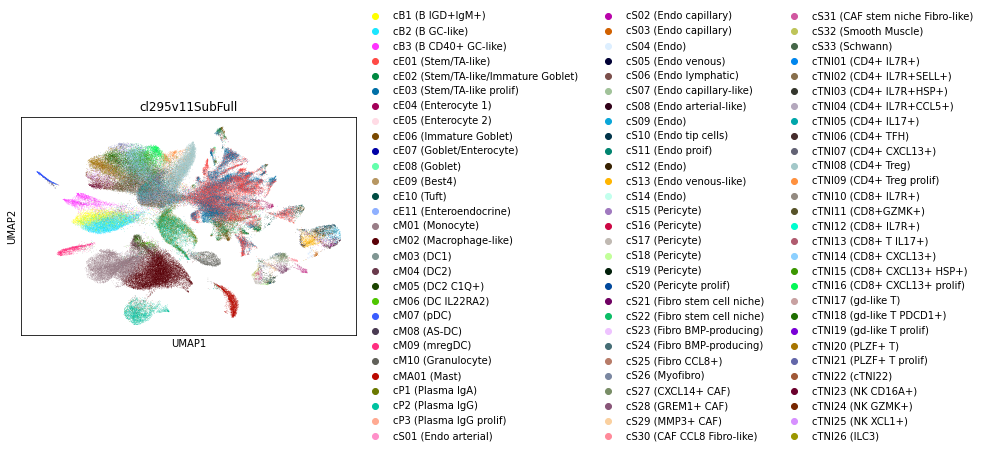

In [17]:
sc.pl.umap(adata, color=['cl295v11SubFull'], palette = sc.pl.palettes.godsnot_102)

C:\Python38\lib\site-packages\anndata\_core\anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'clTopLevel' as categorical
C:\Python38\lib\site-packages\anndata\_core\anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'clMidwayPr' as categorical
C:\Python38\lib\site-packages\anndata\_core\anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reo

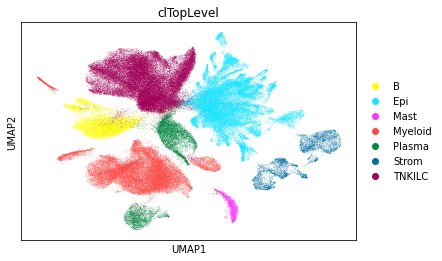

In [ ]:
sc.pl.umap(adata, color=['clTopLevel'], palette = sc.pl.palettes.godsnot_102)

In [ ]:
sc.pl.umap(adata, color=['leiden_0.05'])

NameError: name 'sc' is not defined

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='leiden', use_raw=False, n_genes=1000, method='wilcoxon')

C:\Python38\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Python38\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Python38\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Python38\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Python38\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Python38\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.sta

In [ ]:
import pandas as pd

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("scanpy_pbmc_3k.csv")

In [ ]:
  !python "C:/Users/Nihanth/Documents/AP Research/SCSA/SCSA.py" -d "C:/Users/Nihanth/Documents/AP Research/SCSA/whole.db" -i "C:/Users/Nihanth/Documents/AP Research/scanpy_pbmc_3k.csv" -s scanpy -E -f1.5 -p 0.01 -o result -m txt 

In [5]:
import pandas as pd

In [16]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

ValueError: You need to run `tl.leiden` or `tl.louvain` to compute community labels, or specify `groups='an_existing_key'`

In [ ]:
sc.pl.umap(adata, color=['leiden'])

In [ ]:
adata.obs = adata.obs.drop(["leiden_2.3"], axis=1)

In [ ]:
sc.tl.leiden(adata, resolution = 2, key_added = "leiden_2")

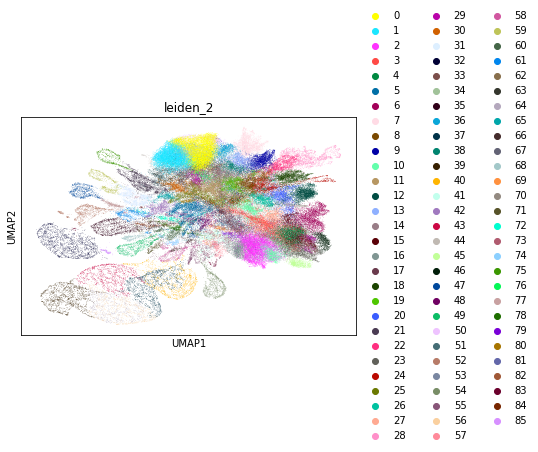

In [ ]:
sc.pl.umap(adata, color=['leiden_2'])

In [ ]:
adata.write("adata_batchcorr_scanorama_leiden.h5ad")

In [ ]:
import scanpy as sc

In [ ]:
tumor_data = sc.read_h5ad("adata_batchcorr_scanorama_leiden.h5ad")

In [ ]:
tumor_data.obs["dummy"] = tumor_data.obs["sample"].astype(str)
allowed_vals = tumor_data.obs["sample"].unique()[110:120]
allowed_vals = list(map(str, allowed_vals))
tumor_data.obs.loc[~tumor_data.obs["dummy"].isin(allowed_vals), "dummy"] = None

C:\Python38\lib\site-packages\anndata\_core\anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'dummy' as categorical


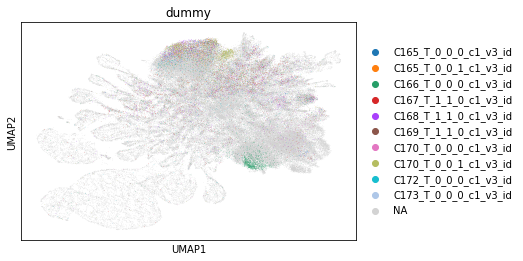

In [ ]:
sc.pl.umap(tumor_data, color=['dummy'], palette=sc.pl.palettes.default_20)

In [30]:
sc.tl.rank_genes_groups(adata, 'cl295v11SubShort', method='wilcoxon', key_added = "ep")


C:\Users\nihan\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\nihan\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\nihan\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\nihan\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\nihan\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: inv

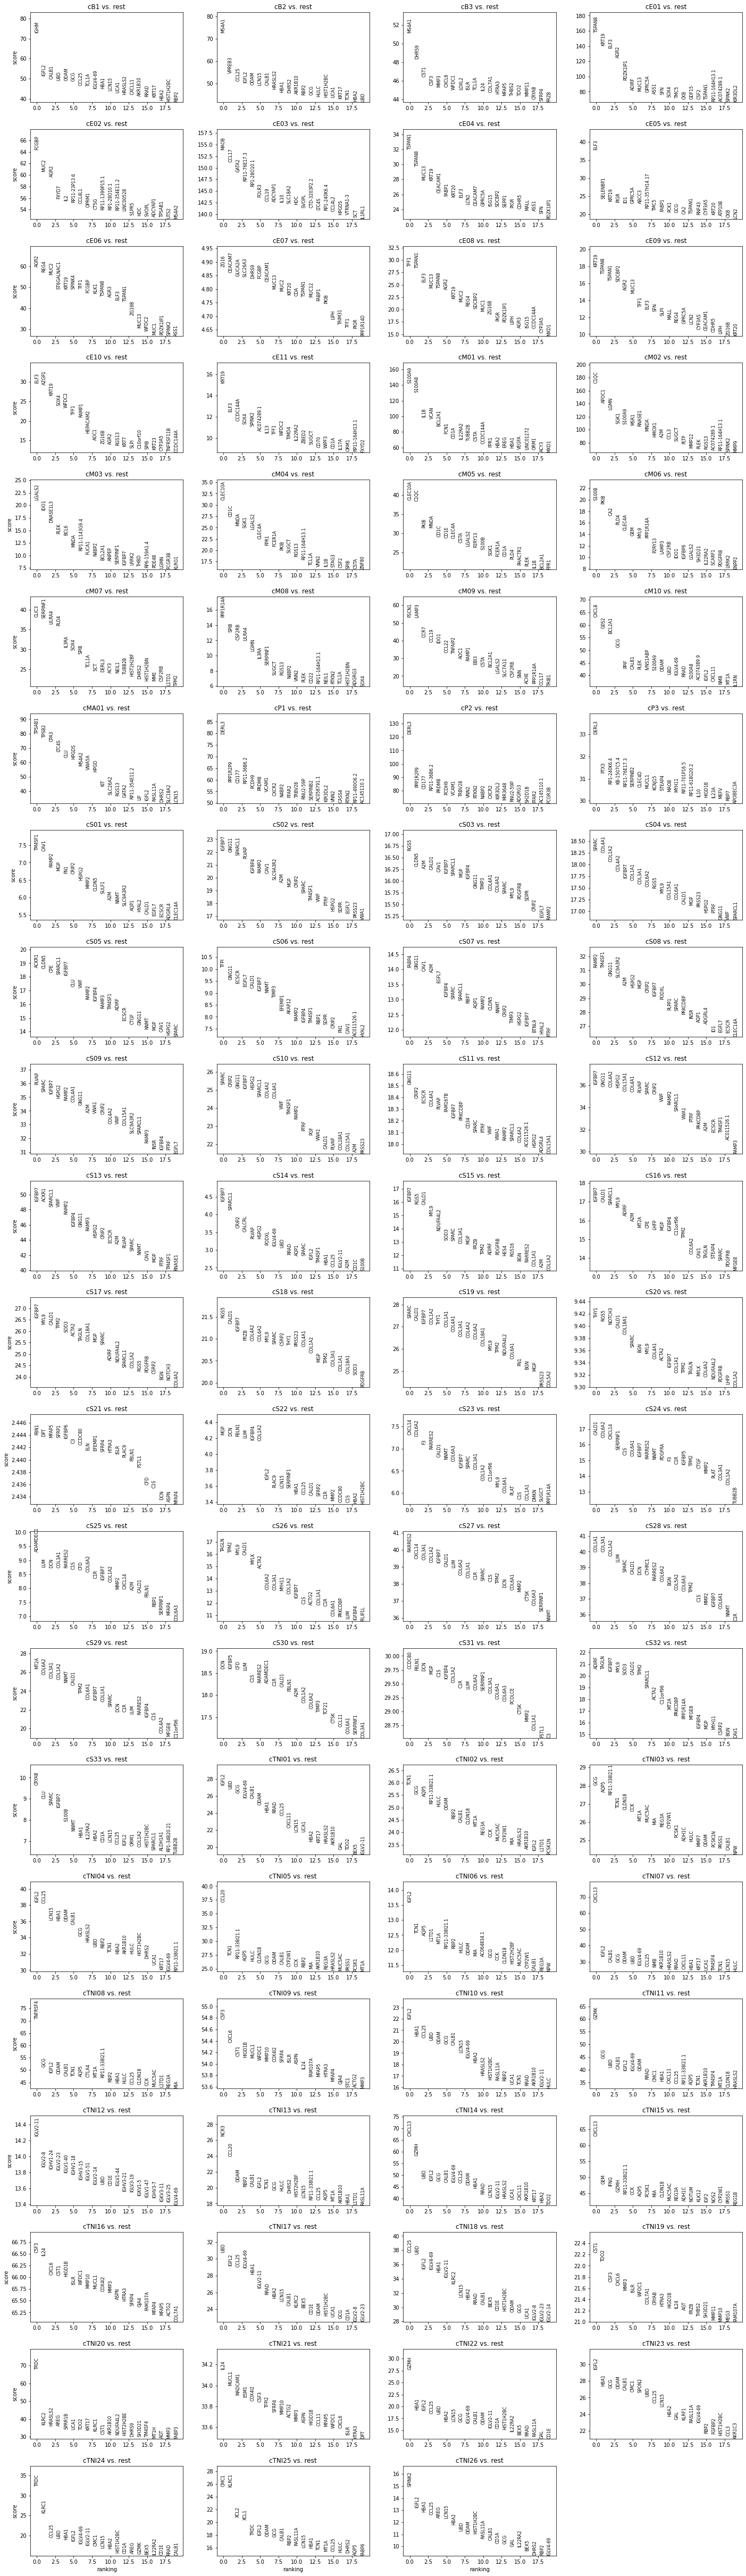

In [31]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, key="ep")

In [ ]:
import pandas as pd

In [ ]:
proportions = pd.DataFrame(data = adata.obs[adata.obs["sample"] == adata.obs["sample"].unique()[0]]['leiden_1.5'].value_counts(normalize=True) * 100).rename(columns={'leiden_1.5': adata.obs["sample"].unique()[0]})

In [ ]:
for i in adata.obs["sample"].unique():
    if i != adata.obs["sample"].unique()[0]:
        df = pd.DataFrame(data = adata.obs[adata.obs["sample"] == i]['leiden_1.5'].value_counts(normalize=True) * 100).rename(columns={'leiden_1.5': i})
        proportions = pd.concat([proportions, df], axis=1, join="outer")

In [ ]:
proportions = proportions.T

In [ ]:
proportions.to_csv("clusterProportions.csv")